<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: **SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Joaquín De Groote
- Nombre de alumno 2: Vicente Pinochet R.

### **Link de repositorio de GitHub:** [Insertar Enlace](https://github.com/Qajirr/MDS7202-Labs)

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Clasificación de pacientes con diabetes (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento, realice los siguientes pasos:
  * Realice una breve exploración de los datos y determine si aplicará transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto)
  * Cree un conjunto de entrenamiento y uno de prueba, con una proporción de 1/3 en el conjunto de prueba. (0.5 puntos)
  * Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el parámetro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el método `.set_output(transform='pandas')`. (1 punto)
  *  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempeño del modelo. (1 punto)

Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

In [2]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Inserte su código aquí
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [4]:
from sklearn.model_selection import train_test_split
# Dividir los datos en características y etiqueta
X = df.drop(columns='Diabetes')
y = df['Diabetes']

# División de datos: 1/3 para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Listado de columnas
standard_scale_cols = ["BMI", "MentHlth", "PhysHlth"]
minmax_scale_cols = ["Age", "GenHlth"]

# Configuración del ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('std_scaler', StandardScaler(), standard_scale_cols),
        ('minmax_scaler', MinMaxScaler(), minmax_scale_cols),
    ],
    remainder='passthrough',  # Opción para descartar columnas no seleccionadas
    verbose_feature_names_out=False
).set_output(transform='pandas')

# Aplicación del preprocesador
X_transformed_train = preprocessor.fit_transform(X_train)
X_transformed_test = preprocessor.fit_transform(X_test)

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import xgboost as xgb

# Definir el modelo XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Crear el pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

# Entrenar el modelo
pipeline.fit(X_transformed_train, y_train)

# Evaluación del modelo en el conjunto de prueba
y_pred = pipeline.predict(X_transformed_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.71      0.74     11651
         1.0       0.73      0.78      0.76     11678

    accuracy                           0.75     23329
   macro avg       0.75      0.75      0.75     23329
weighted avg       0.75      0.75      0.75     23329



Para el preprocesamiento:
- StandardScaler fue aplicado a las variables continuas como BMI, MentHlth y PhysHlth, centrándolas y normalizando su varianza.
- MinMaxScaler fue aplicado a las variables como Age y GenHlth para mantenerlas dentro de un rango específico.
¿Es acaso un buen predictor de diabetes?

- El modelo es un buen predictor de diabetes, logrando una exactitud de 75% y F1-scores equilibrados para ambas clases. Es capaz de predecir la diabetes en la mayoría de los casos correctamente.

Qué buscan explicar las métricas utilizadas?

- Precisión indica el porcentaje de predicciones correctas para cada clase. (Tiene o no tiene diabetes)
- Recall mide que tan bien identifica a los pacientes que efectivamente tienen diabetes
- F1-score equilibra precisión y recall, dando una medida de rendimiento general. (Util para casos balanceados como este)

¿Las métricas permiten asegurar que el modelo haga una buena elección de las features?

- No al 100%. Las métricas reflejan la capacidad predictiva del modelo, pero no aseguran que haya seleccionado las mejores características.

## 3. Importancia de las features con XGBoost (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

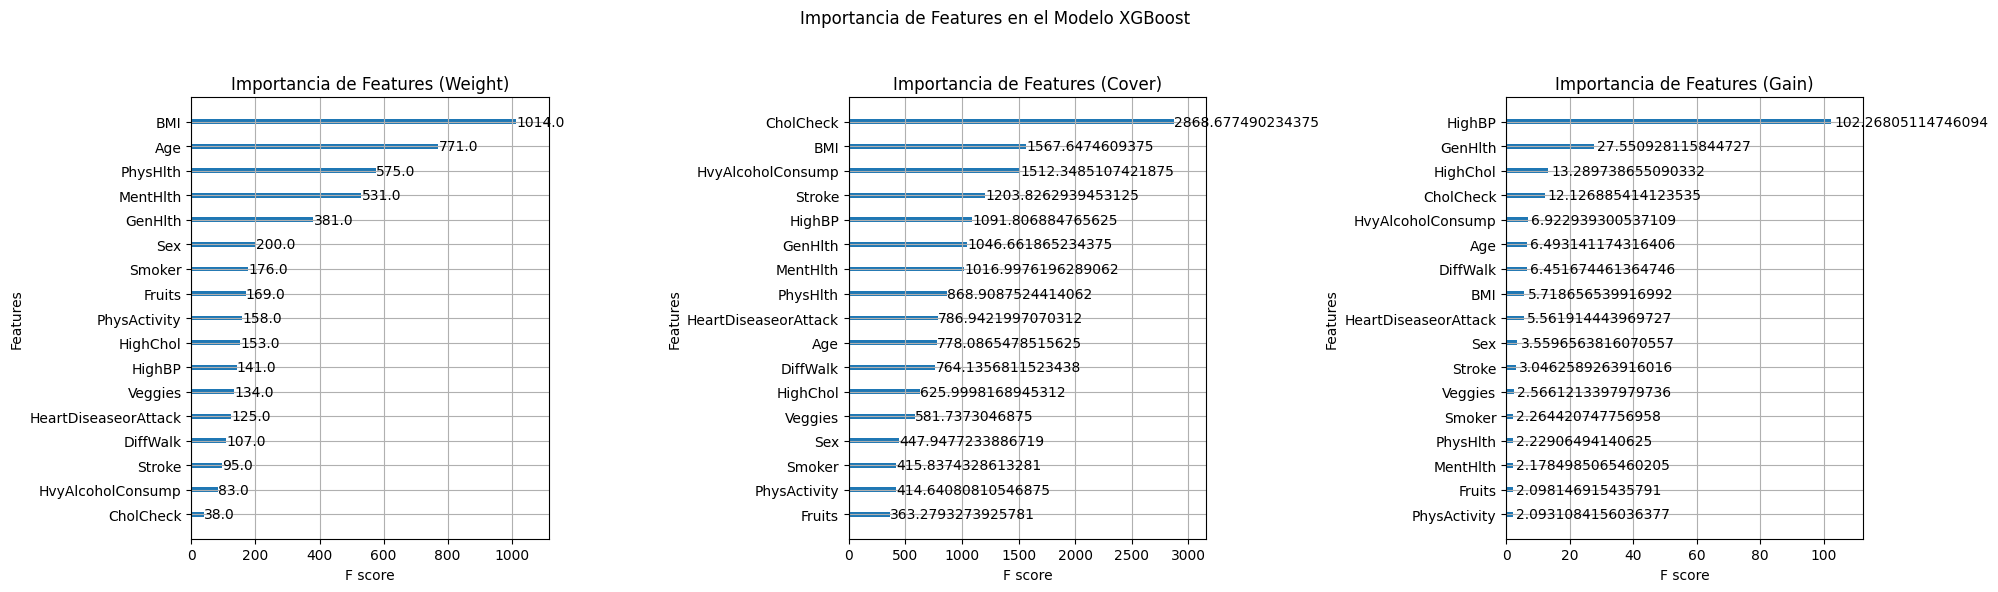

In [7]:
# Inserte su código aquí
from xgboost import plot_importance
import matplotlib.pyplot as plt

xgb_model = pipeline.named_steps['classifier']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("Importancia de Features en el Modelo XGBoost")

# Métrica: Weight
plot_importance(xgb_model, importance_type='weight', ax=axes[0], title='Importancia por Weight')
axes[0].set_title("Importancia de Features (Weight)")

# Métrica: Cover
plot_importance(xgb_model, importance_type='cover', ax=axes[1], title='Importancia por Cover')
axes[1].set_title("Importancia de Features (Cover)")

# Métrica: Gain
plot_importance(xgb_model, importance_type='gain', ax=axes[2], title='Importancia por Gain')
axes[2].set_title("Importancia de Features (Gain)")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## 4. Métodos Agnósticos Globales (10 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)
2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)
3. Visualice los resultados de este método en un gráfico. (2 puntos)
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

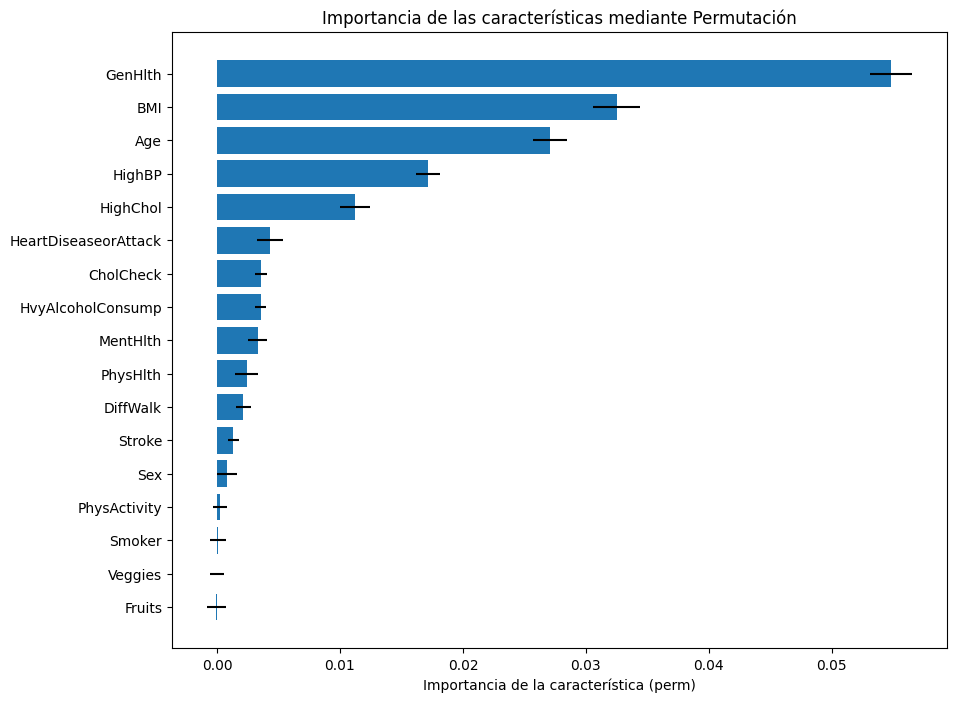

In [8]:
# Inserte su código aquí
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt

# Asegurar que el orden de las columnas sea el correcto para la permutación
feature_names = xgb_model.get_booster().feature_names

# Repetir el proceso 30 veces para calcular la importancia de las características y su desviación estándar
n_repeats = 30
results = permutation_importance(pipeline, X_transformed_test, y_test, n_repeats=n_repeats, random_state=42)

# Almacenar la media y desviación estándar de la importancia de cada característica
perm_importances_mean = results.importances_mean
perm_importances_std = results.importances_std

# Ordenar los resultados para una visualización clara
sorted_idx = perm_importances_mean.argsort()

# Gráfico de la importancia de características mediante permutación
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), perm_importances_mean[sorted_idx], xerr=perm_importances_std[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel("Importancia de la característica (perm)")
plt.title("Importancia de las características mediante Permutación")
plt.show()


1) La propuesta mide la importancia de las características utilizando el método de permutación, que evalúa cómo afecta la precisión del modelo cuando los valores de una característica específica se mezclan de forma aleatoria. La lógica detrás de este enfoque es que, si la permutación de una característica reduce significativamente el desempeño del modelo, entonces esa característica es importante para el modelo.


2) GenHlth: Indica el estado de salud general de la persona
Age: La edad es un factor clave, ya que el riesgo de diabetes suele aumentar con la edad.
HighBP: La presión arterial alta se relaciona frecuentemente con enfermedades metabólicas, incluida la diabetes.
HighChol: El colesterol alto también puede ser un factor de riesgo para la diabetes, dado que ambas condiciones suelen coexistir.
Estas características tienen sentido como factores de riesgo para la diabetes, ya que están relacionadas con la salud metabólica y cardiovascular

3) En el punto anterior, la importancia de las características fue evaluada con los métodos internos de XGBoost (weight, cover y gain). Sin embargo, estos métodos no siempre reflejan el impacto directo de cada característica en la precisión del modelo. Con el método de permutación, observamos un enfoque más objetivo, que refleja cómo cada característica afecta la salida del modelo. En comparación, las características más importantes permanecen consistentes, pero el orden y el impacto pueden variar ligeramente.

4) Ventajas:
Independencia del modelo: Este método no depende de la estructura interna del modelo, por lo que se puede aplicar a cualquier modelo de machine learning.
Interpretabilidad directa: La importancia se basa en el impacto en la precisión del modelo, proporcionando una interpretación directa del valor predictivo de cada característica.
Comparabilidad: Los valores obtenidos son comparables entre diferentes características en términos de su contribución relativa al desempeño del modelo.
Desventajas:
Alto costo computacional: Al requerir múltiples permutaciones, especialmente al repetir el proceso 30 veces, el método es computacionalmente costoso.
Dependencia del conjunto de prueba: Los resultados pueden variar dependiendo del conjunto de prueba, lo que podría afectar la estabilidad de la interpretación.
Posible inestabilidad en datos correlacionados: Si hay correlaciones entre las características, la permutación de una puede afectar indirectamente a otras, lo que puede llevar a interpretaciones erróneas.

## 5. Métodos Agnósticos Locales (20 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/10-24-2024/oMCrLI.gif" width="400">
</p>

### 5.1 Calculando Shap Values (4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. (2 puntos)
2. ¿Qué representa cada número en su resultado? (1 punto)
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

In [9]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

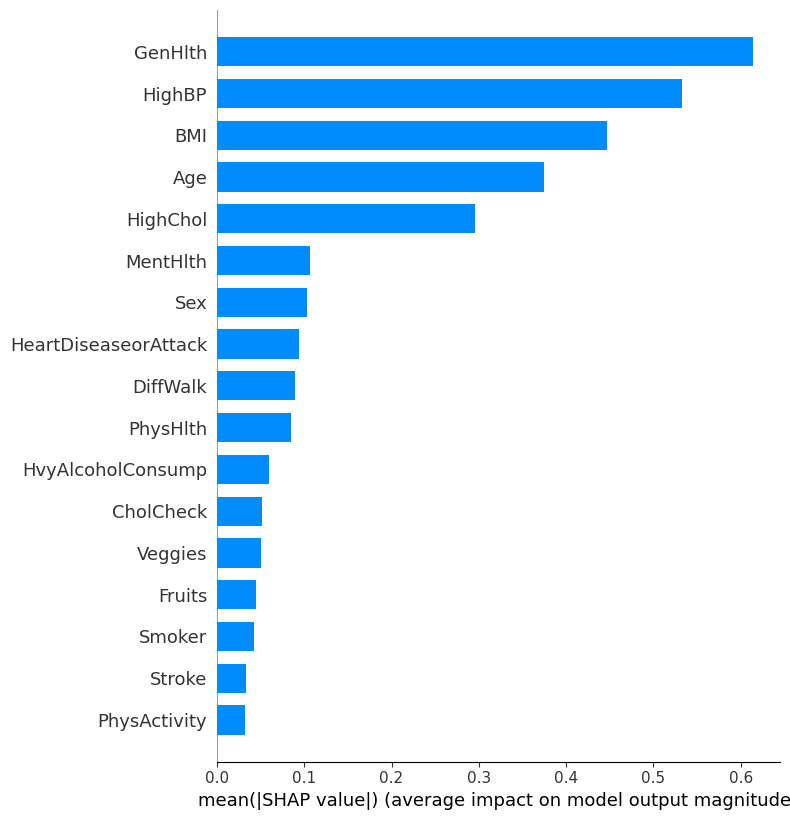

In [11]:
# Inserte código para calcular shapley values aquí
# Importar la librería SHAP
import shap

# Crear el explicador SHAP utilizando el modelo XGBoost
explainer = shap.TreeExplainer(pipeline.named_steps['classifier'])

# Calcular los valores de SHAP para el conjunto de prueba
shap_values = explainer.shap_values(X_transformed_test)

# Visualizar los valores de SHAP para algunas predicciones
shap.summary_plot(shap_values, X_transformed_test, plot_type="bar")


1) Cada numero representa la media de los valores absolutos de SHAP para cada característica, la media de valores absolutos indica el impacto promedio que tiene cada característica en la predicción del modelo. En otras palabras, muestra cuán importante es cada característica, en promedio, para influir en las predicciones. Características con valores medios de SHAP más altos tienen un mayor impacto en el resultado del modelo.


2) Sí, es posible. Los valores de SHAP pueden ser positivos o negativos y reflejan la dirección en la que una característica influye en la predicción de un paciente individual. un valor positivo significa que la característica aumenta la probabilidad de que el modelo prediga un determinado resultado (en este caso, diabetes), mientras que un valor negativo reduce esa probabilidad. Esto permite interpretar no solo la importancia de cada característica, sino también cómo cada característica específica está empujando la predicción hacia una clase o hacia la otra en cada observación individual.

### 5.2 Aporte local (4 puntos)

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)


Gráfico de SHAP para la instancia 1


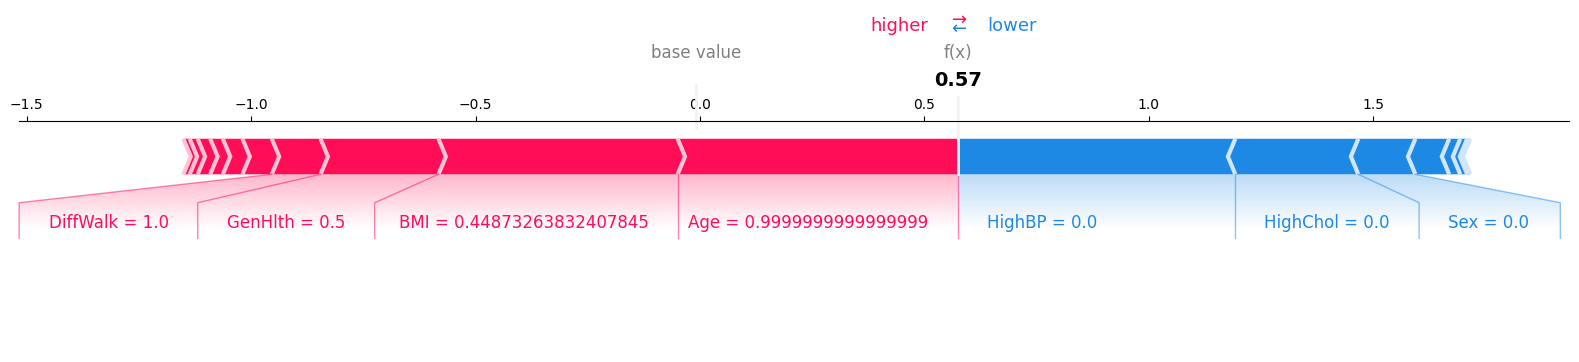


Gráfico de SHAP para la instancia 9


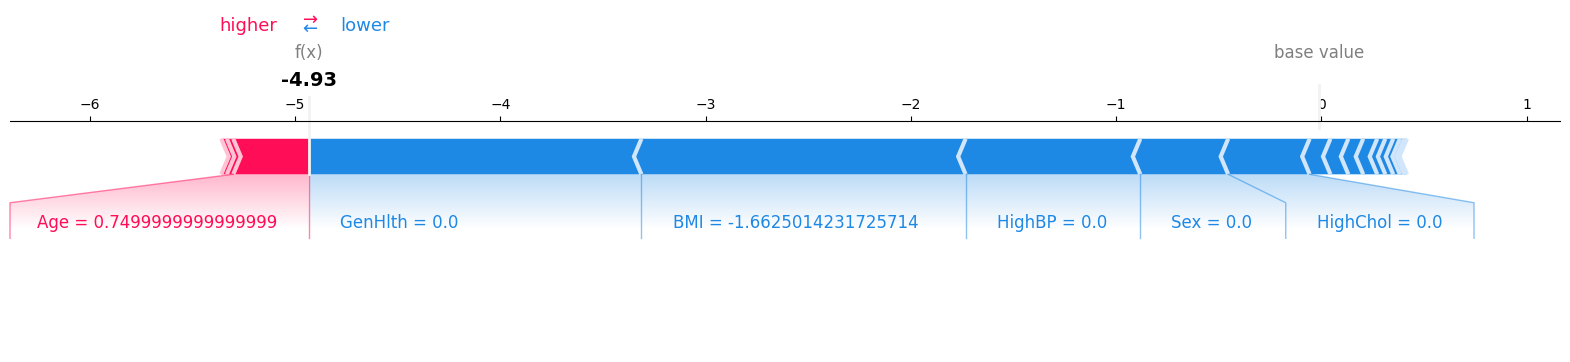


Gráfico de SHAP para la instancia 150


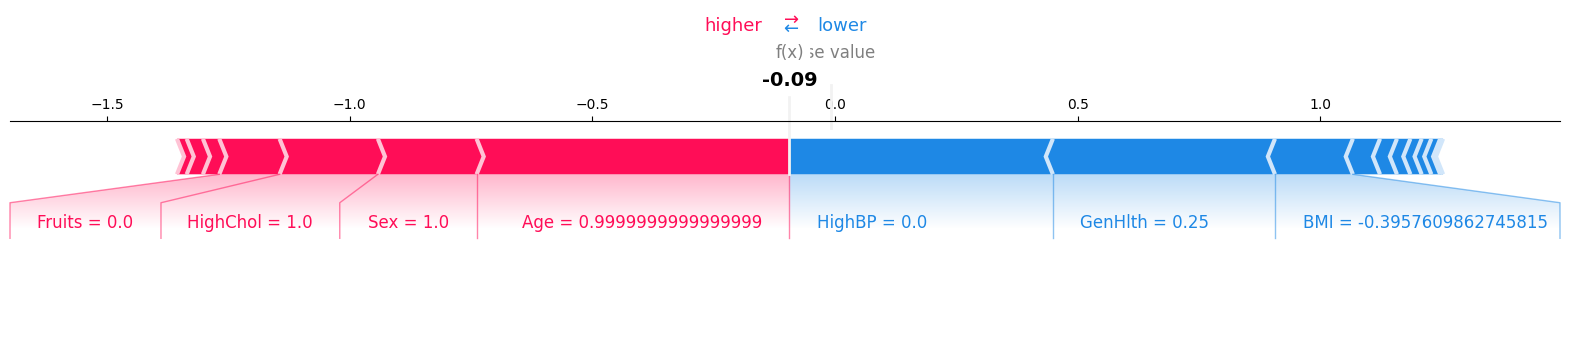

In [13]:
# Inserte código para generar gráficos de aporte local aquí
# Visualizar los valores SHAP para las instancias 1, 9 y 150
instances = [1, 9, 150]

for instance in instances:
    print(f"\nGráfico de SHAP para la instancia {instance}")
    shap.force_plot(explainer.expected_value, shap_values[instance], X_transformed_test.iloc[instance], matplotlib=True)




1) En los gráficos, las variables con color rojo incrementan la probabilidad de que el modelo prediga un diagnóstico de diabetes, mientras que las variables en azul la reducen.
Variables como GenHlth, BMI, Age, DiffWalk y HighChol suelen tener un efecto positivo (rojo) en la probabilidad de diabetes, aumentando el valor de la predicción.
Por otro lado, variables como HighBP, Sex y CholCheck generalmente tienen efectos negativos (azul), lo que disminuye la probabilidad de predecir diabetes en las instancias analizadas.

2) Sí, se observa que GenHlth y BMI aparecen en las tres instancias con un impacto significativo, lo que indica que el estado general de salud y el índice de masa corporal son consistentemente importantes para el modelo en la predicción de diabetes.
La Edad también es una característica recurrente en las instancias analizadas, apareciendo como un factor que incrementa la probabilidad de diabetes.
Variables como HighBP y Sex aparecen con efecto negativo en varias instancias, lo que sugiere que tener presión arterial alta o ser de un determinado género puede disminuir la probabilidad de una predicción de diabetes en ciertos casos.

3) Aunque estas conclusiones son valiosas, no es posible generalizarlas completamente a todo el conjunto de datos solo con estos casos. Los valores de SHAP analizados aquí son específicos para las instancias seleccionadas y muestran cómo cada característica afecta localmente la predicción. Sin embargo, podemos decir que algunas características, como GenHlth, BMI y Age, tienen un impacto recurrente y significativo, lo cual sugiere que también pueden ser relevantes a nivel global. Para generalizar estos resultados, se requeriría un análisis agregado de los valores de SHAP en todo el dataset.

### 5.3 Aporte global (4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

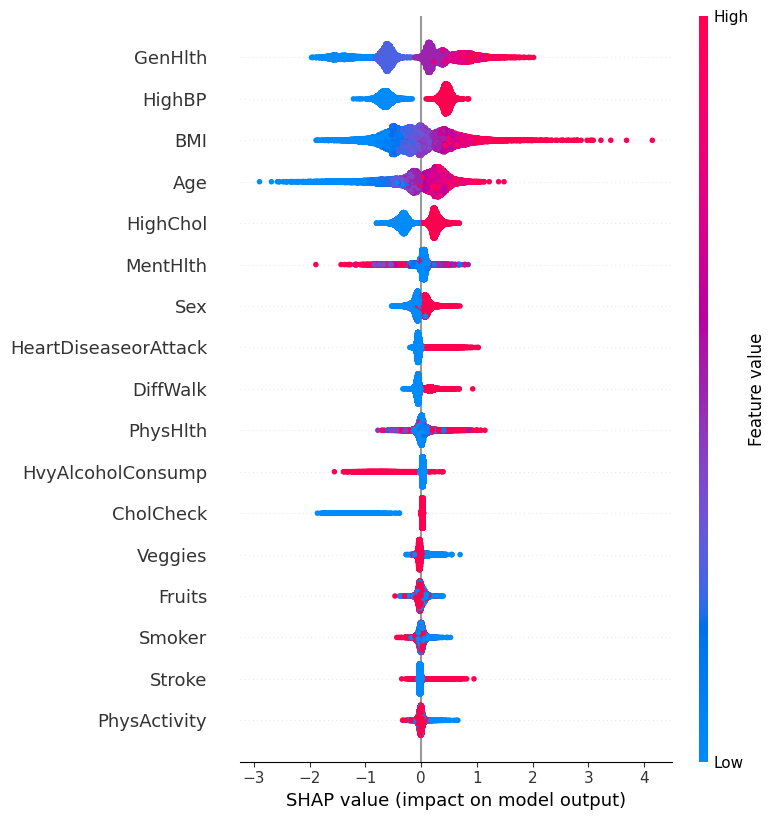

In [14]:
# Inserte código para generar gráficos de aporte global aquí
# Generar un gráfico de resumen de SHAP para ver el impacto global de cada característica
shap.summary_plot(shap_values, X_transformed_test, plot_type="dot")


### 5.4 Scatter plot (4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

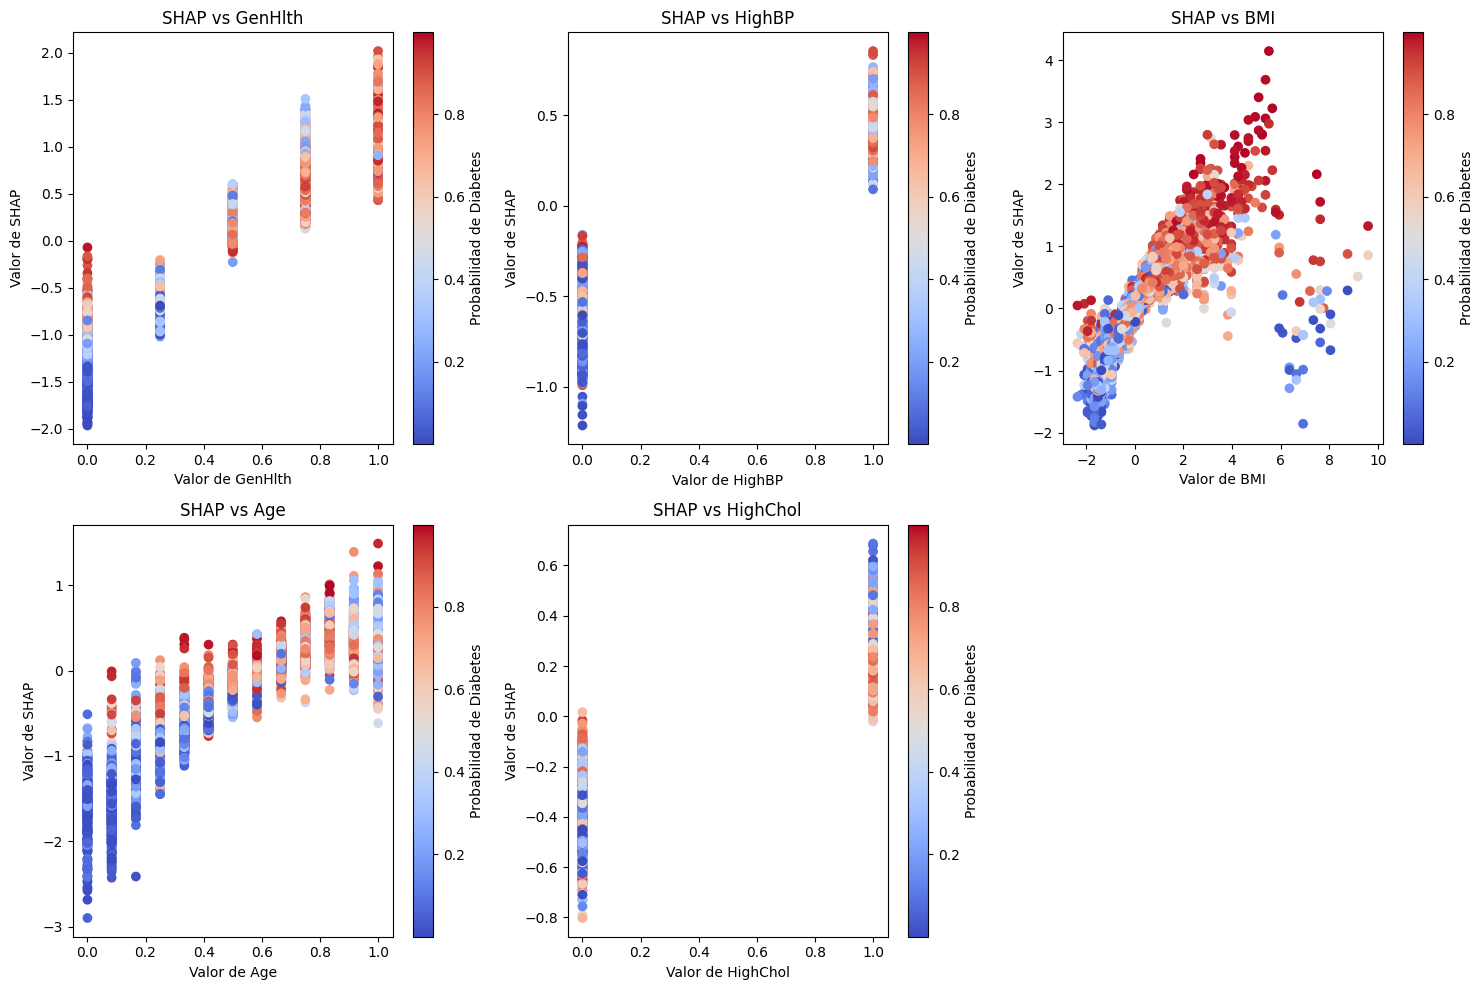

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Las cinco características más importantes, basadas en el gráfico global
top_features = ["GenHlth", "HighBP", "BMI", "Age", "HighChol"]

# Obtener las probabilidades de predicción para el conjunto de prueba
y_prob = pipeline.predict_proba(X_transformed_test)[:, 1]

# Crear los gráficos de dispersión
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    # Scatter plot de SHAP values vs. valores de la característica
    scatter = plt.scatter(
        x=X_transformed_test[feature],
        y=shap_values[:, X_transformed_test.columns.get_loc(feature)],
        c=y_prob,
        cmap="coolwarm"
    )
    plt.colorbar(scatter, label='Probabilidad de Diabetes')
    plt.title(f"SHAP vs {feature}")
    plt.xlabel(f"Valor de {feature}")
    plt.ylabel("Valor de SHAP")

plt.tight_layout()
plt.show()


GenHlth: Observamos una relación clara entre el valor de SHAP y el valor de la característica GenHlth. A medida que el valor de GenHlth (estado general de salud) aumenta, el valor de SHAP también tiende a ser positivo, lo que sugiere que un peor estado de salud (valores más altos) aumenta la probabilidad de predicción de diabetes. Esta relación es coherente, ya que una mala salud general suele estar asociada con un mayor riesgo de enfermedades crónicas como la diabetes.

HighBP: Para la característica HighBP (presión arterial alta), los puntos están mayormente distribuidos en dos niveles (0 y 1), dado que es una variable binaria. Los valores altos de HighBP tienden a tener un valor de SHAP ligeramente positivo, lo que indica que la presión arterial alta puede contribuir ligeramente a aumentar la probabilidad de diabetes en el modelo.

BMI: En el caso del BMI (índice de masa corporal), se observa una relación positiva en la que, a medida que el BMI aumenta, los valores de SHAP también aumentan, especialmente para valores más altos de probabilidad de diabetes (en rojo). Esto es consistente con el conocimiento médico, ya que un mayor índice de masa corporal es un factor de riesgo importante para la diabetes.

Age: Para la característica Age, se observa un patrón en el cual los valores de SHAP tienden a aumentar con la edad, lo que indica que un aumento en la edad contribuye a una mayor probabilidad de diabetes. Los puntos en rojo (mayor probabilidad de diabetes) tienden a concentrarse en los valores altos de Age.

HighChol: Similar a HighBP, la característica HighChol (colesterol alto) es binaria y muestra una ligera tendencia a aumentar el valor de SHAP cuando está presente (valor 1). Esto sugiere que tener colesterol alto también incrementa marginalmente la probabilidad de diabetes en el modelo.

en general tenemos una relación entre características y diabetes, GenHlth, BMI, Age, HighBP y HighChol muestran relaciones claras con la probabilidad de diabetes. Valores altos en estas características tienden a aumentar la probabilidad de predicción de diabetes.

### 5.5 Partial Dependence Plot (4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

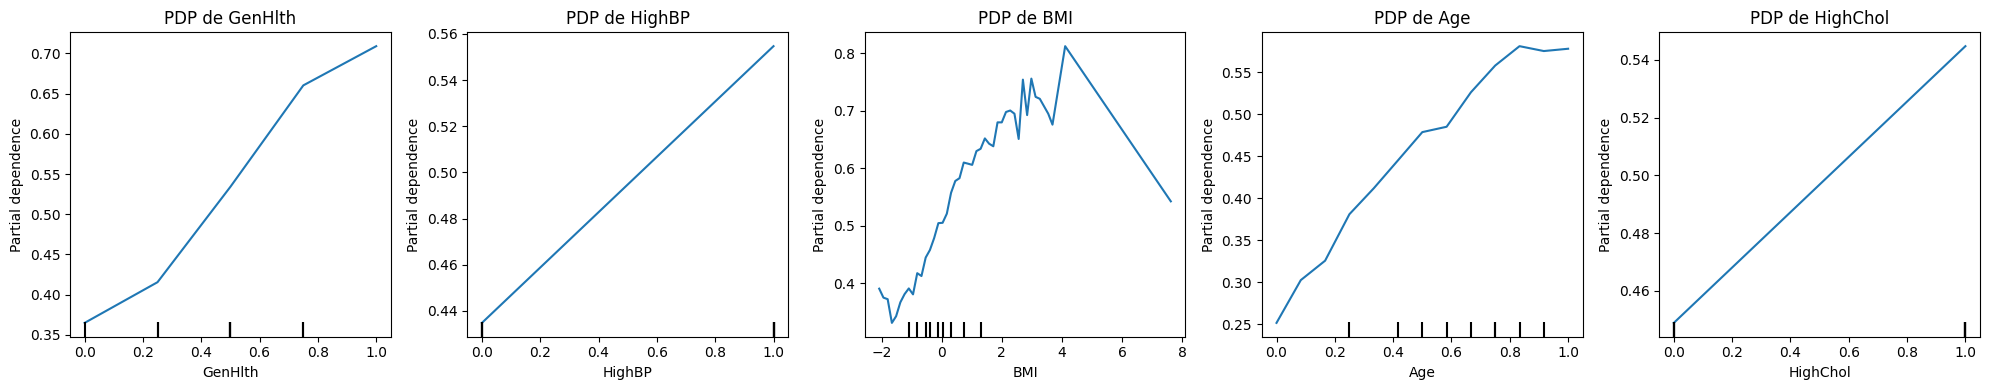

In [17]:
# Inserte código para generar gráficos PDP aquí
from sklearn.inspection import PartialDependenceDisplay
from sklearn.utils import resample

# Seleccionamos una submuestra de 1000 observaciones del conjunto de prueba
X_sample, y_sample = resample(X_transformed_test, y_test, n_samples=1000, random_state=42)

# Las cinco características más importantes basadas en el impacto global
top_features = ["GenHlth", "HighBP", "BMI", "Age", "HighChol"]

# Generar gráficos de dependencia parcial para las características seleccionadas
fig, ax = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

# Crear el gráfico de dependencia parcial
for i, feature in enumerate(top_features):
    PartialDependenceDisplay.from_estimator(pipeline, X_sample, [feature], ax=ax[i])
    ax[i].set_title(f"PDP de {feature}")

plt.tight_layout()
plt.show()


GenHlth: Se observa una relación positiva entre GenHlth (estado general de salud) y la probabilidad promedio de diabetes. A medida que GenHlth aumenta (es decir, la salud general es peor), también lo hace la salida promedio del modelo, indicando un mayor riesgo de diabetes para aquellos con un peor estado de salud.

HighBP: La relación entre HighBP (presión arterial alta) y la probabilidad de diabetes es lineal y positiva. Cuando HighBP pasa de 0 a 1, la probabilidad promedio de diabetes aumenta, lo cual tiene sentido ya que la presión arterial alta suele asociarse con un mayor riesgo de enfermedades metabólicas.

BMI: La relación entre el BMI (índice de masa corporal) y la probabilidad de diabetes muestra un comportamiento no lineal. A medida que el BMI aumenta, también lo hace la probabilidad de diabetes, especialmente en rangos más altos. Sin embargo, en el extremo superior, la relación se estabiliza o incluso disminuye ligeramente, lo que puede indicar una saturación en el impacto del BMI en la predicción de diabetes.

Age: La probabilidad promedio de diabetes aumenta con la Edad. Este comportamiento es casi lineal, lo que refleja que la diabetes es más común en personas de mayor edad, ya que el riesgo de diabetes suele incrementarse con la edad.

HighChol: Al igual que con HighBP, la relación entre HighChol (colesterol alto) y la probabilidad de diabetes es positiva y bastante lineal. Cuando HighChol pasa de 0 a 1, la probabilidad promedio de diabetes aumenta, sugiriendo que el colesterol alto es un factor de riesgo adicional.

Estas conclusiones son **en gran medida** generalizables al conjunto de datos completo, ya que los gráficos de dependencia parcial capturan el efecto promedio de cada característica en la predicción del modelo. Sin embargo, dado que estamos utilizando una submuestra de 1000 observaciones, pueden existir ligeras variaciones si se evalúa el conjunto completo de datos. Además, los PDP asumen independencia entre características, lo cual puede limitar la precisión en datasets donde las características están altamente correlacionadas.

## 6. Sistema de Reglas! (10 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. 
En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

`Hint:` Como debe entregar las columnas que entran al clasificador entrenado de su pipeline, le será útil extraer el paso de preprocesamiento y generar dataframes preprocesados para el conjunto `train` y `test`. 

In [18]:
!pip install alibi

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/24.5 MB ? eta -:--:--
   --- ------------------------------------ 2.1/24.5 MB 10.7 MB/s eta 0:00:03
   --- ------------------------------------ 2.1/24.5 MB 10.7 MB/s eta 0:00:03
   ----- ---------------------------------- 3.1/24.5 MB 5.0 MB/s eta 0:00:05
   ----- ---------------------------------- 3.1/24.5 MB 5.0 MB/s eta 0:00:05
   -------- ------------------------------- 5.2/24.5 MB 5.0 MB/s eta 0:00:04
   ---------- ----------------------------- 6.3/24.5 MB 5.1 MB/s eta 0:00:04
   ----------- ---------------------------- 7.3/24.5 MB 5.3 MB/s eta 0:00:04
   ------------- -------------------------- 8.4/24.5 MB 5.4 MB/s eta 0:00:03
   ------------- -------------------------- 8.4/24.5 MB 5.4 MB/s eta 0:00:03
   --------------- ------------------------ 9.4/24.5 MB 4.6 MB/s eta 0:00:04
   ----------------- ---------------------- 10.5/24.5 MB 4.7 MB/s eta 0:00:03
   ----


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from alibi.explainers import AnchorTabular

In [24]:
# Inserte su código para generar sistema de reglas aquí

idx = 1000
# explicar predicción idx 1000

idx = 3001
# explicar predicción idx 3001

idx = 5751
# explicar predicción idx 5751

In [23]:
# Extraer el preprocesador del pipeline
preprocessor = pipeline.named_steps['preprocessor']

# Generar dataframes preprocesados para train y test
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Seleccionar una submuestra de 1000 observaciones de entrenamiento para ajuste del explicador
X_sample = X_train_preprocessed.sample(n=1000, random_state=42)

# Entrenar el clasificador
xgb_model = pipeline.named_steps['classifier']

# Inicializar el explicador de Anchor
feature_names = X_train_preprocessed.columns.tolist()
explainer = AnchorTabular(xgb_model.predict, feature_names=feature_names)

# Ajustar el explicador con los datos de entrenamiento
explainer.fit(X_sample.to_numpy(), disc_perc=[25, 50, 75])

# Observaciones para explicar
indices = [1000, 3001, 5751]

# Explicar cada observación con Anchor
for idx in indices:
    print(f"\nExplicación para la observación {idx}:")
    explanation = explainer.explain(X_test_preprocessed.iloc[idx].to_numpy(), threshold=0.95)
    print("Reglas propuestas:", explanation.anchor)
    print("Precisión de las reglas:", explanation.precision)
    print("Cobertura en el conjunto de datos:", explanation.coverage)


Explicación para la observación 1000:
Reglas propuestas: []
Precisión de las reglas: [1.]
Cobertura en el conjunto de datos: 1

Explicación para la observación 3001:
Reglas propuestas: []
Precisión de las reglas: [1.]
Cobertura en el conjunto de datos: 1

Explicación para la observación 5751:
Reglas propuestas: []
Precisión de las reglas: [1.]
Cobertura en el conjunto de datos: 1


# Retrospectiva... (10 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>